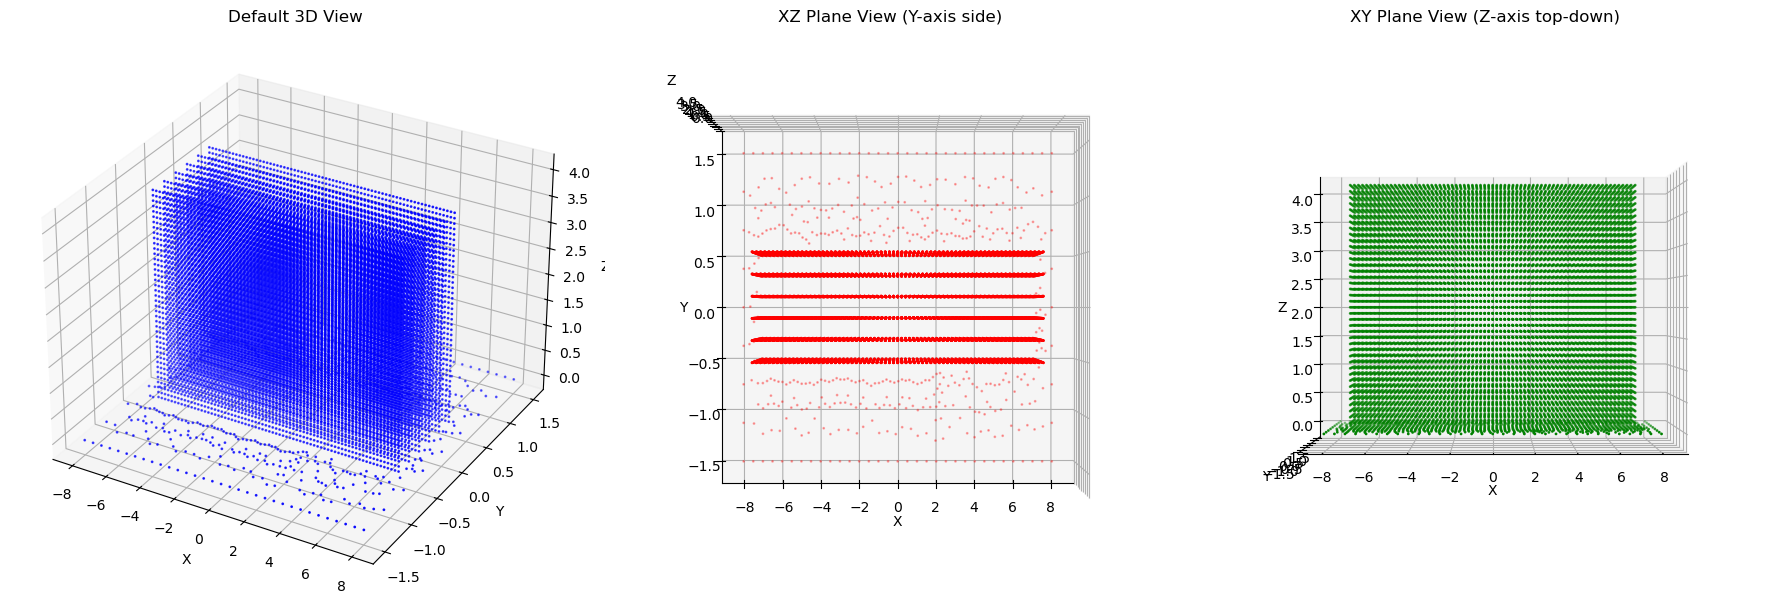

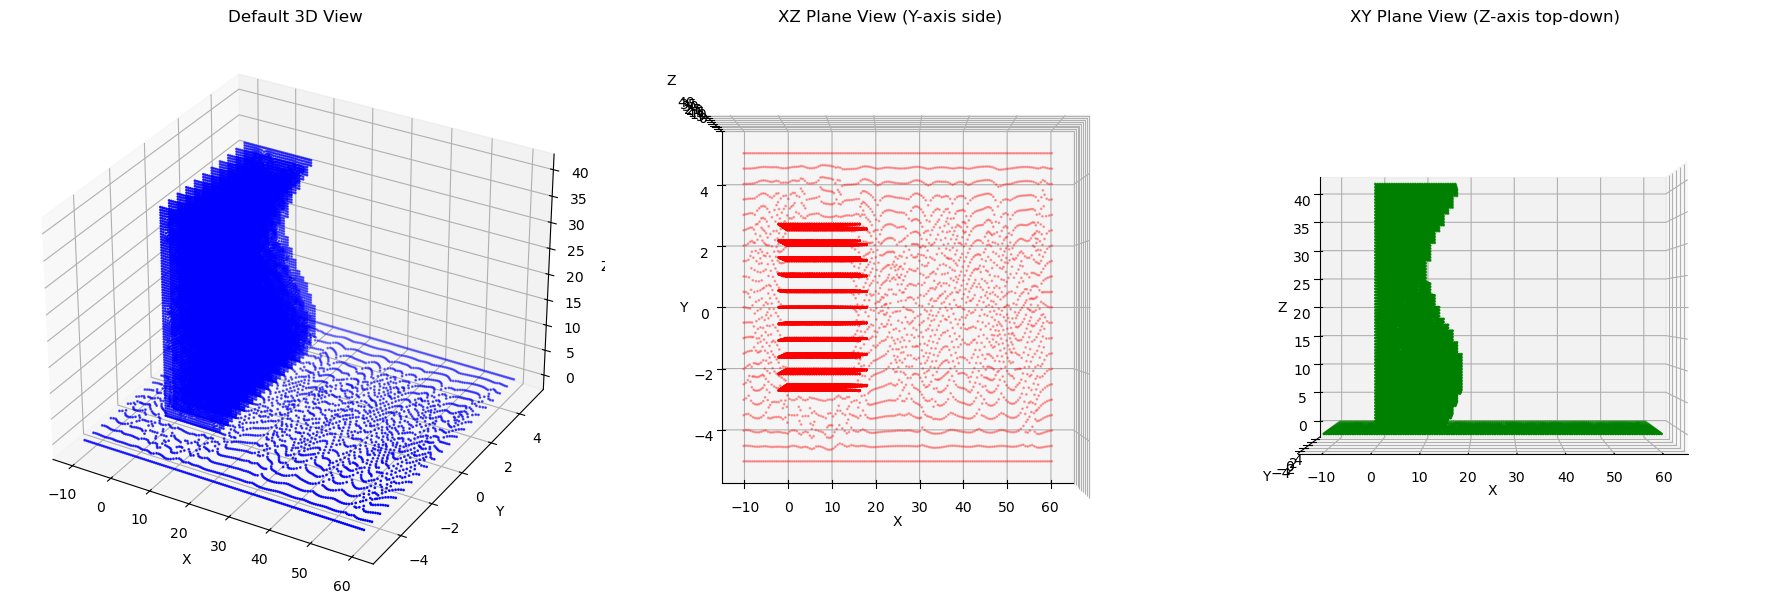

In [17]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def extract_nodes_from_k_file(file_path):
    coords = []
    in_node_section = False

    with open(file_path, 'r') as f:
        for line in f:
            stripped = line.strip()

            if stripped.startswith("*NODE"):
                in_node_section = True
                continue
            elif in_node_section and stripped.startswith("*"):
                break
            elif in_node_section and stripped and not stripped.startswith("$"):
                parts = stripped.split()
                if len(parts) >= 4:
                    try:
                        x = float(parts[1])
                        y = float(parts[2])
                        z = float(parts[3])
                        if z>= 0.0:
                            coords.append((x, y, z))
                    except ValueError:
                        continue
    return coords


def plot_triple_view(coords, title="3D Node Views"):
    xs, ys, zs = zip(*coords)

    fig = plt.figure(figsize=(18, 6))

    # ▶️ 기본 3D 시점
    ax1 = fig.add_subplot(1, 3, 1, projection='3d')
    ax1.scatter(xs, ys, zs, c='b', s=1)
    ax1.set_title("Default 3D View")
    ax1.set_xlabel("X")
    ax1.set_ylabel("Y")
    ax1.set_zlabel("Z")

    # ▶️ XZ 평면 시점 (Y축 측면에서 보기)
    ax2 = fig.add_subplot(1, 3, 2, projection='3d')
    ax2.scatter(xs, ys, zs, c='r', s=1)
    ax2.set_title("XZ Plane View (Y-axis side)")
    ax2.set_xlabel("X")
    ax2.set_ylabel("Y")
    ax2.set_zlabel("Z")
    ax2.view_init(elev=90, azim=-90)

    # ▶️ XY 평면 시점 (Z축 위에서 보기)
    ax3 = fig.add_subplot(1, 3, 3, projection='3d')
    ax3.scatter(xs, ys, zs, c='g', s=1)
    ax3.set_title("XY Plane View (Z-axis top-down)")
    ax3.set_xlabel("X")
    ax3.set_ylabel("Y")
    ax3.set_zlabel("Z")
    ax3.view_init(elev=0, azim=-90)

    plt.tight_layout()
    plt.show()


# 경로 및 실행
k_file_path = "/home/ftk3187/github/GAMMA/GEOASNO_research/DED_GAMMA_solver/examples/wall/thinwall.k"
coords = extract_nodes_from_k_file(k_file_path)
plot_triple_view(coords)

# 경로 및 실행
k_file_path = "/home/ftk3187/github/GAMMA/GEOASNO_research/DED_GAMMA_solver/00_masking/input_k/input_00.k"
coords = extract_nodes_from_k_file(k_file_path)
plot_triple_view(coords)



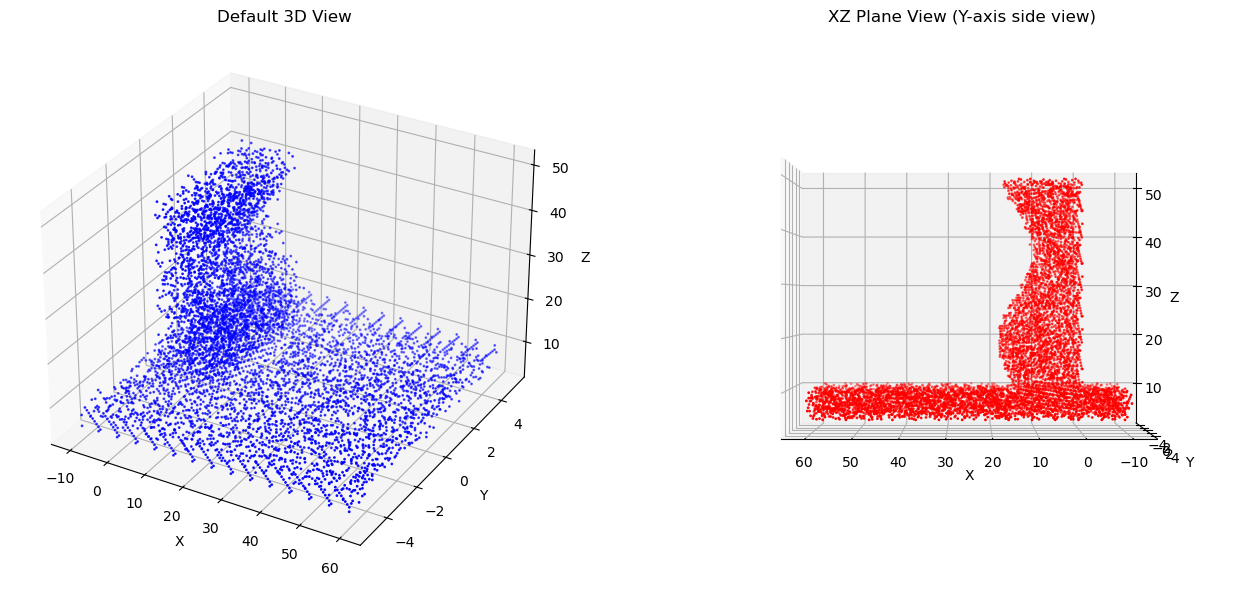

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def extract_nodes_from_k_file(file_path):
    coords = []
    in_node_section = False

    with open(file_path, 'r') as f:
        for line in f:
            stripped = line.strip()
            if stripped.startswith("*NODE"):
                in_node_section = True
                continue
            elif in_node_section and stripped.startswith("*"):
                break
            elif in_node_section and stripped and not stripped.startswith("$"):
                parts = stripped.split()
                if len(parts) >= 4:
                    try:
                        x = float(parts[1])
                        y = float(parts[2])
                        z = float(parts[3])
                        coords.append((x, y, z))
                    except ValueError:
                        continue
    return coords


def plot_dual_view(coords, title="3D Node Views", sample_rate=1):
    # 🔻 샘플링
    coords = coords[::sample_rate]

    xs, ys, zs = zip(*coords)

    fig = plt.figure(figsize=(14, 6))

    # ▶️ 기본 3D 시점
    ax1 = fig.add_subplot(1, 2, 1, projection='3d')
    ax1.scatter(xs, ys, zs, c='b', s=1)
    ax1.set_title("Default 3D View")
    ax1.set_xlabel("X")
    ax1.set_ylabel("Y")
    ax1.set_zlabel("Z")

    # ▶️ XZ 평면 시점 (Y축 측면에서 보기)
    ax2 = fig.add_subplot(1, 2, 2, projection='3d')
    ax2.scatter(xs, ys, zs, c='r', s=1)
    ax2.set_title("XZ Plane View (Y-axis side view)")
    ax2.set_xlabel("X")
    ax2.set_ylabel("Y")
    ax2.set_zlabel("Z")
    ax2.view_init(elev=0, azim=90)

    plt.tight_layout()
    plt.show()


# 실행
k_file_path = "/home/ftk3187/github/GAMMA/GEOASNO_research/DED_GAMMA_solver/00_masking/input_k/input_00.k"
coords = extract_nodes_from_k_file(k_file_path)
plot_dual_view(coords, sample_rate=10)  # 🔺 10개 중 1개만 시각화


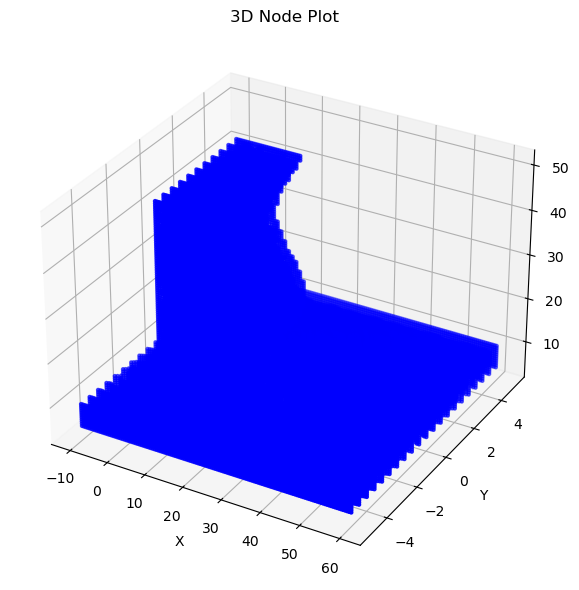

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def extract_nodes_from_inp(file_path):
    coords = []
    in_node_section = False

    with open(file_path, 'r') as f:
        for line in f:
            line = line.strip()
            if line.upper().startswith("*NODE"):
                in_node_section = True
                continue
            elif in_node_section and line.startswith("*"):
                break  # 다음 섹션으로 넘어가면 종료
            elif in_node_section and line:
                parts = line.split(",")
                if len(parts) >= 4:
                    try:
                        x = float(parts[1])
                        y = float(parts[2])
                        z = float(parts[3])
                        coords.append((x, y, z))
                    except ValueError:
                        continue
    return coords

def plot_3d_nodes(coords, title="3D Node Plot"):
    xs, ys, zs = zip(*coords)

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(xs, ys, zs, s=5, c='blue')
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.set_title(title)
    plt.tight_layout()
    plt.show()

# 경로 지정 및 실행
inp_path = "/home/ftk3187/github/GAMMA/GEOASNO_research/DED_GAMMA_solver/00_masking/input_swapped_offset/input_00.inp"
node_coords = extract_nodes_from_inp(inp_path)
plot_3d_nodes(node_coords)
